## Chapter 5: Convolutional Neural Networks

`Convolutional Neural Networks` (CNNs) are a class of deep learning models primarily used for processing and analyzing visual data, such as images and videos. They are specifically designed to capture spatial hierarchies and patterns in data by utilizing convolutional layers. CNNs have proven to be highly effective in tasks like image classification, object detection, image segmentation, and more

### 5.1: Convolutional layers


The term **locality** or **convolution** is thus what essentially differentiates typical ANNs from CNNs. Within ANNs, each neuron in a fully connected layer depends on every pixel of the input image. This leads to a dependence on non-local information and parameters. When working with CNNs, however, we are no longer working with only fully connected layers. As such, we use local information from the input image. As each neuron thus depends on a small number of pixels, the neuron should be able to learn the features in these pixels more quickly.

This feature of the network to depend on local features is enabled through `Convolutional layers`. They are fundamental building blocks in CNNs.

Convolutional layers can capture **local patterns and features** within the data  by applying `convolutional filters` (also called kernels) to small regions of the input data. For instance, when we try to classify images of cats and dogs, certain features are more important at distinguishing the classes than others, such as whiskers for cats. They are called **local features** because they are represented by the same part of the image.






#### 5.1.1: Convolution of functions

In a convolutional layer, each neuron is connected to a local region of the input data through a convolutional filter. The filter's parameters are learned during the training process, allowing the network to adapt and extract relevant features from the input data.

The operation to enable this local dependency is performed through a mathematical operation called `convolution of matrices`. This operation is mathematically closely related to the concept of `convolution of functions`.




The key idea of the convolution of functions is to **combine two functions in a way that captures how one function influences the other** as they **overlap and shift relative to each other**. This operation is used to produce a new function that reveals the **relationship between the original functions in terms of their overlapping regions**.

The convolution of functions can be thought of as a process of **sliding one function over another**, while at each position, **multiplying the values of the overlapping portions** of the functions and then **summing up** these products.

Given this description, any convolution is made of the following four key parameters:

**1. Overlap and Influence**:
  - As one function moves across another, the overlapping regions determine how much influence one function has on the other at different points.
  - The multiplication of the values of the overlapping regions quantifies this influence.

**2. Shifting and Position**:
  - The convolution involves trying all possible shifts of one function relative to the other.
  - This shifting captures the spatial relationships and interactions between the functions.

**3. Integration**:
   - In the continuous case, the convolution formula includes an integral that sums up the products of the overlapping regions across all possible positions.
   - In the discrete case, this integration is approximated using summation.

**4. Feature Extraction**:
  - The final convolution helps in extracting features, patterns, or characteristics from one function based on the properties of another function.

The result is a new function that **encodes the influence or interaction between the original functions** as they **shift along the local input domain**. This is a fundamental concept used in signal processing, image analysis, and various applications in mathematics and engineering.

Mathematically speaking, a convolution of two functions is given as follows:

Let's clarify this with an example. Let's say we have two functions $f$ and $g$ where:

- $f(x) = e^{-x^2}$
- $g(x) = \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}}$

Taken from the convolution operations, we perform the following stepsin the Python code below:

1. Define the range of x values for which the functions should be evaluated


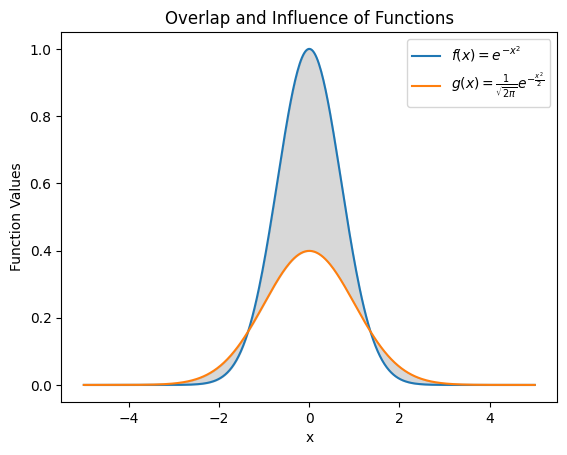

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the functions
def f(x):
    return np.exp(-x**2)

def g(x):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-x**2 / 2)

# Define the range of x values
x = np.linspace(-5, 5, 400)

# Plot the functions and their overlapping regions
plt.plot(x, f(x), label='$f(x) = e^{-x^2}$')
plt.plot(x, g(x), label='$g(x) = \\frac{1}{\\sqrt{2\\pi}}e^{-\\frac{x^2}{2}}$')
plt.fill_between(x, f(x), g(x), color='gray', alpha=0.3)
plt.xlabel('x')
plt.ylabel('Function Values')
plt.legend()
plt.title('Overlap and Influence of Functions')
plt.show()


2. Determine the overlap and influence of the functions within the x range
3. Determine how shifting one function relative to the other affects the convolution result. This is performed for all possible shifts
4. Integrate the functions by calculating an integral summing up the products of the overlapping regions

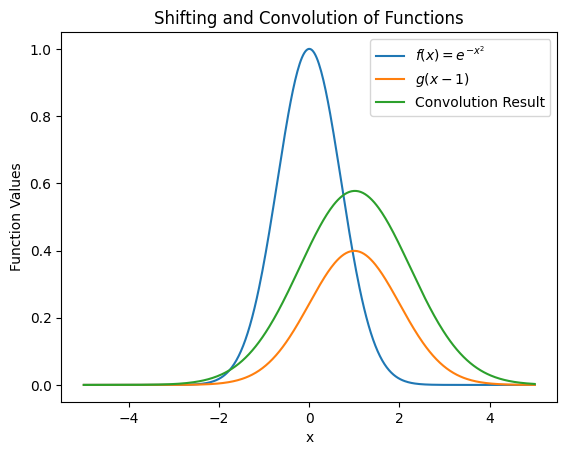

In [ ]:
# Define the range of x values
x = np.linspace(-5, 5, 400)

# Shifted version of function g(x)
shifted_g = g(x - 1)

# Convolve the original function f(x) with the shifted g(x)
convolution_result = np.convolve(f(x), shifted_g, mode='same') * (x[1] - x[0])

# Plot the original and shifted functions, along with the convolution result
plt.plot(x, f(x), label='$f(x) = e^{-x^2}$')
plt.plot(x, shifted_g, label='$g(x-1)$')
plt.plot(x, convolution_result, label='Convolution Result')
plt.xlabel('x')
plt.ylabel('Function Values')
plt.legend()
plt.title('Shifting and Convolution of Functions')
plt.show()


The green line specifically shows the final convolution result. It shows how the functions interact with each other once they overlap and shift relative to each other. Especially, we note three things:

**1. Interaction Capture**:
  - In the convolution result plot, you'll notice that the shape of the result resembles the product of the two original functions f(x) and g(x)
  - The convolution process captures the interactions by combining and summing the products of corresponding values from both functions as they slide past each other

**2. Central Peak**:
  - The convolution result exhibits a central peak, which indicates that the interaction between the two functions is most significant when their overlapping regions align
  - The peak captures the combined effect of the functions' values at that particular position
  
**3. Width and Spread**:
  - The width of the convolution result is influenced by the widths of both functions
  - The result is a smoothed and broadened version of the individual functions.

#### 5.1.2: Convolution of matrices

The `convolutiuon of matrices` is based on the convolution of functions.

Convolution of matrices is a mathematical operation that **combines two matrices to produce a third matrix**.

The concept of convolution involves these three steps. First, we are **sliding a smaller matrix (known as a kernel or filter) over the elements of a larger matrix** (input data), performing **element-wise multiplication** between the **overlapping elements** of the input and the kernel, and then **summing up the results to produce a single value**.

This process is repeated across **all possible positions of the kernel over the input matrix**, resulting in an output matrix known as the **feature map**.

Given this description, any convolution of matrices is quite similar to the function convolution operation. As such, it is made of the following four key parameters:

**1. Input Matrices**:
  - You have two matrices:
    - the **input** matrix (often called the image or input feature map)
      - It represents the **data you want to process**
    - the **kernel** matrix (also known as the filter)
      - It represents a **small filter** (window) that slides over the input matrix
  - (This is similar to the two functions before)

**2. Element-Wise Multiplication and Summation**:
  - The kernel matrix slides over the input matrix, and at each position, element-wise multiplication is performed between the **overlapping elements** of the input matrix and the kernel matrix
  - The results of these multiplications are then summed up to produce a single value
  - (These are the same operations as before over the overlapping parts of the integrated functions)

**3. Sliding and Overlapping**:
  - The kernel matrix slides over the entire input matrix, moving one step at a time
    - The slide is determined by a parameter called the `stride`
  - At each position, the element-wise multiplication and summation are performed, capturing the interaction between the local regions of the input and the kernel
  - (This is the same as the shifting parameters)

**4. Output Matrix (Feature Map)**:
  - The results of the element-wise multiplications and summations are placed in an output matrix
    - This matrix is called the `feature map`
    - The feature map highlights patterns, features, or characteristics in the input data that are recognized by the kernel

The convolution operation captures patterns and features present in the input matrix by applying the kernel matrix over different positions. The kernel matrix is typically much smaller than the input matrix, allowing it to detect specific local patterns.


##### 5.1.2.1: Hadamard Product and Feature Detection

Mathematically speaking, a convolution of matrices can be expressed as an **inner product of matrices**. Any inner product of matrices is defined as `Hadamard product`.

---
**Definition 11**: Let A,B be $D \times D$ matrices. Then the Hadamard product of A and B, denoted as $A \odot B$, is defined as:

$$
A \odot B = \sum_{i,j=1}^D a_{i,j}b_{i,j}
$$

---



We can show that the **convolution** of a $D \times D$ kernel matrix and an $N \times M$ input matrix is equal to a **matrix of Hadamard products** between K and the various $D \times D$ submatrices of the input matrix and the kernel matrix.

As such, we can understand a convolution with the following three steps:

1. Laying the kernel matrix on a specific part of the input matrix
2. Performing the element-wise multiplication and summation (= Hadamard product) at the overlaying (= overlapping) matrix part
3. Shifting across the matrix whereas the shift from one to the other position is defined by a stride parameter

##### 5.1.2.2: Numerical Example

Let's provide you with a numerical example.

---

$$\textbf{Input Matrix}:$$

---

$$
\begin{bmatrix}
0 & 1 & 2 & 3 & 0 \\
4 & 5 & 8 & 6 & 8 \\
7 & 8 & 9 & 1 & 3 \\
\end{bmatrix}
$$

---

$$\textbf{Kernel Matrix}:$$

---

$$
\begin{bmatrix}
1 & 0 & -1 \\
2 & 0 & -2 \\
1 & 0 & -1 \\
\end{bmatrix}
$$

---

$$\textbf{Dimension of the final matrix: 3-3+1 x 5-3+1 = 1x3}:$$

---

---

$$\textbf{Element-wise Multiplication and Summation of overlaps with Shift Parameter = 1}:$$

---

$$
\begin{bmatrix}
0 & 1 & 2 \\
4 & 5 & 8 \\
7 & 8 & 9 \\
\end{bmatrix}
\odot
\begin{bmatrix}
1 & 0 & -1 \\
2 & 0 & -2 \\
1 & 0 & -1 \\
\end{bmatrix}
=
\sum
\begin{bmatrix}
0 & 0 & -2 \\
8 & 0 & -16 \\
7 & 0 & -19\\
\end{bmatrix}
= -12
$$



$$
\begin{bmatrix}
1 & 2 & 3 \\
5 & 8 & 6 \\
8 & 9 & 1 \\
\end{bmatrix}
\odot
\begin{bmatrix}
1 & 0 & -1 \\
2 & 0 & -2 \\
1 & 0 & -1 \\
\end{bmatrix}
=
\sum
\begin{bmatrix}
1 & 0 & -3 \\
10 & 0 & -12 \\
8 & 0 & -1\\
\end{bmatrix}
= 3.0
$$

$$
\dots
$$


---

$$\textbf{Final 1x3 Vector}:$$

---


$$
Convolution = [-12,3,8]
$$

Here, we exactly followed the three steps defined above:

1. Laying the kernel matrix on a specific part of the input matrix
2. Performing the element-wise multiplication and summation (= Hadamard product) at the overlaying (= overlapping) matrix part
3. Shifting across the matrix whereas the shift from one to the other position is defined by a stride parameter

Importantly, because the number of rows is the same for both the input and kernel matrix, we understand that we can only shift horizontally, and not vertically. As such, we have a one-dimensional stride parameter.

In Python, we can retrieve the same result inf the following way:

In [ ]:
import numpy as np
from scipy.signal import convolve2d

# Define the input matrix and the kernel
input_matrix = np.array([[0, 1, 2, 3, 0],
                         [4, 5, 8, 6, 8],
                         [7, 8, 9, 1, 3]])

kernel = np.array([[1, 0, -1],
                   [2, 0, -2],
                   [1, 0, -1]])

# Apply convolution using convolve2d
convolution_result = convolve2d(input_matrix, kernel, mode='valid')

# Print the input matrix, kernel, and convolution result
print("Input Matrix:")
print(input_matrix)

print("\nKernel:")
print(kernel)

print("\nConvolution Result (Feature Map):")
print(convolution_result)


Input Matrix:
[[0 1 2 3 0]
 [4 5 8 6 8]
 [7 8 9 1 3]]

Kernel:
[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]

Convolution Result (Feature Map):
[[12 -3 -8]]


#### 5.1.3: Convolutional layer function

Let's now define a `convolutional layer function`. This is the main building block of a CNN. Conceptually, this is identical to the layer function of the perceptrons we encountered in ANNs.

Mathematically speaking, it can be defined as follows:

---

**Definition 12**: Let $K$ be a $D \times D$ kernel matrix of parameters and let $N$ and $M$ be integers such that $D \leq N,M$. A convolutional layer function is a mapping $c: \mathbb R^{N\times M} \to \mathbb R^{(N-D+1)\times(M-D+1)}$ of the following form:

$$
c(X) = \bar\lambda(K * X + b)
$$

where:

- X is an $M \times N$ matrix
- b is the bias term of dimensions $(N-D+1)\times(M-D+1)$
- $\bar\lambda$ is an activation function

---



##### 5.1.3.1: Concolutional neuron functions

Convolutional layer functions can also be defined as a matrix of `convolutional neuron functions`.

---

**Definition 13**: Let $K$ be a $D \times D$ kernel matrix of parameters and let $N$ and $M$ be integers such that $D \leq N,M$. Then for integers i, j such that $1 \leq i \leq N-D+1$ and $1 \leq j \leq M-D+1$, a convolutional neuron function is a mapping $q_{i,j}: \mathbb R^{N \times M} \to \mathbb R$ of the form:

$$
q_{i,j}(X) = K \odot X[i,j;D] + b_{i,j}
$$

where:

- X is an $M \times N$ matrix
- X[i,j;D] is a submatrix of X
- b is the bias term of dimensions $(N-D+1)\times(M-D+1)$
- $\odot$ is the Hadamard product of the submatrix of X and the kernel matrix K

---

As such we can, again, define each entry $q_{i,j}(X)$ as the Hadamard product of K with the submatrix X of the same size at indices i,j:

$$
c(X) =
\begin{bmatrix}
q_{1,1}(X) & \dots & q_{1,M-D+1}(X) \\
\vdots & \ddots & \vdots \\
q_{N-D+1,1}(X) & \dots & q_{N-D+1, M-D+1}(X)
\end{bmatrix}
$$

### 5.2.: Padding Layers


Padding layers are a type of layer used to adjust the spatial dimensions of the input data before or after applying certain operations, such as convolution or pooling. The primary purpose of padding layers is to control the size of the feature maps throughout the network architecture, ensuring that important information is not lost at the boundaries of the data.

The phenomenon of information being "lost" on the edges of an image is often referred to as the "border effect" or "edge effect," and it happens because the operations are not applied to the edge pixels of the input image in the same way as the central pixels. This is because the entries on the edges of an images are only used once when calculating the convolutional layer as a matrix of Hadamard products. On the other hand, any element in the middle of the matrix will be used $D^2$ times for the Hadamard products. Consequently, the information stored at the edge of a matrix is weighted less on the resulting matrix than the features encoded in the middle. This leads to the fact that CNNs are less sensitive to features near to boundaries of an image.

Padding layers can be implemented as two options:

**1. Same Padding**:
  - Same padding ensures that the output feature map has the same spatial dimensions as the input
  - It does this by adding zeros (or other specified values) around the input data before applying the operation
  - Same padding is useful to prevent the shrinking of feature maps and to maintain spatial information during convolution or pooling

**2. Valid Padding**:
  - Valid padding, on the other hand, means no padding is added, and the operation is only performed on regions where the input data and the operation kernel fully overlap
  - This typically results in a smaller output feature map compared to the input



### 5.4: Pooling Layers

Pooling layers aim to downsample the spatial dimensions of the feature maps obtained from convolutional layers, reducing the computational complexity and controlling overfitting, while retaining the essential features and patterns present in the data.

Remember that the individual features of one convolutional layer are a matrix of Hadamard products of the individual submatrices and the kernel matrix. Consequently, the larger the Hadamard product, the more important is a feature due to the multiplicative behaviour of the convolutional layer. As such, the idea behind pooling is to remove smaller entries of the convolutional layer while keeping larger ones with the idea that the larger entries correspond to the more important features.

There are two common types of pooling layers: max pooling and average pooling.

**1. Max Pooling**:

  - Max pooling is a pooling operation that selects the maximum value from a group of values in a local region of the input feature map
  - The input feature map is divided into non-overlapping regions, and the maximum value from each region is chosen to form the pooled output
  - Max pooling helps identify dominant features in a specific region while providing invariance to small translations or distortions in the input.

**2. Average Pooling**:
  - Average pooling computes the average of the values in each local region of the input feature map
  - Similar to max pooling, the input feature map is divided into non-overlapping regions, and the average value from each region is calculated to create the pooled output
  - Average pooling tends to smooth out the features, and it's generally less sensitive to outliers than max pooling

The key characteristics and benefits of pooling layers are as follows:

**1. Downsampling**:

  - Pooling layers reduce the spatial dimensions of the feature maps, reducing computational complexity and memory requirements in subsequent layers

**2. Translation Invariance**:

  - Pooling helps create translation invariance, meaning that the network can recognize the same feature regardless of its exact position in the input
  - This is especially important for features that are locally important but not tied to specific positions

**3. Feature Reduction**:

  - Pooling reduces the number of parameters and computations in the network, helping to prevent overfitting by reducing the model's capacity to memorize the training data

**4. Feature Hierarchy**:

  - Pooling layers are often used in conjunction with convolutional layers to create a hierarchical representation of features
  - Convolutional layers extract local features, and pooling layers combine these features to recognize more abstract patterns

### 5.5: The general worfkflow of a CNN

The architecture of a CNN typically consists of convolutional layers, activation functions, pooling layers, fully connected layers, and an output layer.

Here's the summary and comprehensive description of the key components in a CNN:

**1. Input Layer**:

  - The input layer represents the raw data, often an image or a sequence of images. Each element in the input data corresponds to a pixel value in the case of images
  - The size of the input data determines the dimensions of the input layer

**2. Convolutional Layers**:
  - Convolutional layers are responsible for learning and detecting features in the input data
  - Each convolutional layer consists of multiple learnable filters (kernels) that slide over the input data and perform convolution operations
  - These operations capture local patterns and features, which are then used to create feature maps that represent different levels of abstraction
  - Convolutional layers can have parameters like the number of filters, kernel size, and stride, and they can apply padding to control the size of the output feature maps

**3. Activation Functions**:

 - Activation functions introduce non-linearity to the network, allowing it to learn complex relationships in the data
 - Common activation functions include ReLU (Rectified Linear Unit), sigmoid, and tanh
 - ReLU is widely used due to its simplicity and ability to mitigate the vanishing gradient problem

**4. Pooling Layers**:

 - Pooling layers reduce the spatial dimensions of feature maps while retaining important information
 - Max pooling and average pooling are commonly used. Pooling is applied by dividing the feature map into local regions and selecting the maximum or average value from each region
 - This reduces the computation and controls overfitting while providing translation invariance

**5. Fully Connected Layers**:
 - After multiple convolutional and pooling layers, the feature maps are often flattened and passed through fully connected layers
 - These layers resemble traditional neural network layers and are responsible for making final decisions based on the extracted features
 - They can learn complex relationships and patterns across the entire feature space

**6. Output Layer**:

 - The output layer provides the final prediction or classification based on the information learned from the previous layers
 - It can consist of one or more neurons, depending on the problem
 - Activation functions are often chosen based on the nature of the task, such as softmax for multi-class classification

**7. Padding**:

  - Padding is applied to the input data before convolutional and pooling operations
  - It helps control the size of the feature maps and prevents information loss at the edges of the data
  - "Same" padding ensures that the output feature maps have the same spatial dimensions as the input, while "valid" padding reduces the size of the feature maps

The general workflow of a CNN involves feeding input data through convolutional and pooling layers to extract hierarchical features, followed by fully connected layers for classification or regression. The network's parameters are learned through a training process using labeled data and backpropagation to minimize the loss function, just as in ANNs. THe

### 5.6: Differences between ANNs and CNNs

Note that many steps throughout the definition and execution the architectures and the training of ANNs and CNNs are similar. However, they have substantial differences, especially in the following points:

key differences between ANNs and CNNs:

**1. Input Data**:

- ANNs: ANNs are designed for processing structured data, such as tabular data with fixed features.
- CNNs: CNNs are designed for processing grid-like data, such as images and other multidimensional data like audio spectrograms and video frames.

**2. Architecture**:

- ANNs: ANNs consist of fully connected layers where each neuron is connected to every neuron in the adjacent layers.
- CNNs: CNNs consist of convolutional layers that apply filters (kernels) over local regions of the input data, followed by pooling layers and fully connected layers.

**3. Local Connectivity**:

- ANNs: In ANNs, each neuron is connected to every neuron in the adjacent layers, resulting in a dense, fully connected architecture.
- CNNs: CNNs exploit local connectivity by using shared weights for filters, which allows them to capture local patterns and features.

**4. Parameter Sharing**:

- ANNs: Parameters are not shared between neurons, resulting in a large number of parameters, especially in deep architectures.
- CNNs: CNNs use parameter sharing, where the same set of weights is applied across different regions of the input data. This leads to fewer parameters and better generalization for images with similar features.

**5. Feature Extraction**:

- ANNs: ANNs lack the capability to automatically extract hierarchical features from input data.
- CNNs: CNNs are specifically designed to extract hierarchical features from input data, making them highly effective for image recognition and computer vision tasks.

**6. Translation Invariance**:

- ANNs: ANNs are sensitive to changes in input data, which can lead to limited translation invariance.
- CNNs: CNNs inherently exhibit translation invariance due to the use of shared weights in convolutional layers, making them robust to small translations in input data.

**7. Layer Types**:

- ANNs: ANNs consist of input layers, hidden layers (often fully connected), and output layers.
- CNNs: CNNs consist of convolutional layers, activation functions, pooling layers, fully connected layers, and an output layer.

**8. Data Preprocessing**:

- ANNs: For ANNs, data preprocessing might involve standardization, normalization, and feature engineering.
- CNNs: For CNNs, data preprocessing might involve resizing images, normalization, and sometimes data augmentation.
